In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregando o arquivo CSV com os dados

In [144]:
df = pd.read_csv('recipes.csv')

In [145]:
df

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


Descrição dos Dados

In [146]:
df.describe()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,...,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691
unique,69,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,American,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
freq,40150,55362,57690,57467,57604,55258,57654,57065,57680,57678,...,57542,57319,55479,56957,56665,57658,57605,54289,56634,56584


Verificando se existem dados nulos

In [147]:
df.isnull().sum()

country       0
almond        0
angelica      0
anise         0
anise_seed    0
             ..
wood          0
yam           0
yeast         0
yogurt        0
zucchini      0
Length: 384, dtype: int64

Convertemos o nome de todas as colunas para maiúsculo

In [148]:
df.columns = df.columns.str.upper()

Lista de países no Dataset

In [149]:
print('Lista de Países: ',df['COUNTRY'].unique(),'\n')
print('Número de Países: ',len(df['COUNTRY'].unique()),'\n')
print(df['COUNTRY'].value_counts().reset_index())

Lista de Países:  ['Vietnamese' 'Indian' 'Spanish_Portuguese' 'Jewish' 'French'
 'Central_SouthAmerican' 'Cajun_Creole' 'Thai' 'Scandinavian' 'Greek'
 'American' 'African' 'MiddleEastern' 'EasternEuropean_Russian' 'Italian'
 'Irish' 'Mexican' 'Chinese' 'German' 'Mediterranean' 'Japanese'
 'Moroccan' 'Southern_SoulFood' 'English_Scottish' 'Asian' 'Southwestern'
 'chinese' 'mexico' 'japanese' 'east_asian' 'asian' 'western' 'korean'
 'italian' 'Canada' 'Turkey' 'Caribbean' 'Bangladesh' 'India' 'France'
 'Italy' 'Israel' 'Korea' 'Iran' 'Eastern-Europe' 'South-African'
 'UK-and-Ireland' 'China' 'Belgium' 'Germany' 'South-America' 'Spain'
 'Netherlands' 'Scandinavia' 'Philippines' 'Indonesia' 'East-African'
 'Vietnam' 'Thailand' 'Switzerland' 'West-African' 'North-African'
 'Pakistan' 'Portugal' 'Mexico' 'Lebanon' 'Malaysia' 'Austria' 'Japan'] 

Número de Países:  69 

         COUNTRY  count
0       American  40150
1         Mexico   1754
2        Italian   1715
3          Italy   1461
4   

Acima vemos que existem variações nos nomes para os mesmos países, para resolver o problema de duplicação iremos limpar os dados e converter todos nomes de países para maiúsculo

In [150]:
df['COUNTRY'] = df['COUNTRY'].str.upper()
df['COUNTRY'] = df['COUNTRY'].replace({
    'EAST_ASIAN':'ASIAN',
    'EAST-AFRICAN':'AFRICAN',
    'NORTH-AFRICAN':'AFRICAN',
    'SOUTH-AFRICAN':'AFRICAN',
    'WEST-AFRICAN':'AFRICAN',
    'CHINA':'CHINESE',
    'FRANCE':'FRENCH',
    'GERMANY':'GERMAN',
    'INDIA':'INDIAN',
    'ITALY':'ITALIAN',
    'JAPAN':'JAPANESE',
    'KOREA':'KOREAN',
    'MEXICO':'MEXICAN',
    'THAILAND':'THAI',
    'VIETNAM':'VIETNAMESE'})

Número de países após a limpeza

In [151]:
print('Lista de Países: ',df['COUNTRY'].unique(),'\n')
print('Número de Países: ',len(df['COUNTRY'].unique()),'\n')
print(df['COUNTRY'].value_counts().reset_index())

Lista de Países:  ['VIETNAMESE' 'INDIAN' 'SPANISH_PORTUGUESE' 'JEWISH' 'FRENCH'
 'CENTRAL_SOUTHAMERICAN' 'CAJUN_CREOLE' 'THAI' 'SCANDINAVIAN' 'GREEK'
 'AMERICAN' 'AFRICAN' 'MIDDLEEASTERN' 'EASTERNEUROPEAN_RUSSIAN' 'ITALIAN'
 'IRISH' 'MEXICAN' 'CHINESE' 'GERMAN' 'MEDITERRANEAN' 'JAPANESE'
 'MOROCCAN' 'SOUTHERN_SOULFOOD' 'ENGLISH_SCOTTISH' 'ASIAN' 'SOUTHWESTERN'
 'WESTERN' 'KOREAN' 'CANADA' 'TURKEY' 'CARIBBEAN' 'BANGLADESH' 'ISRAEL'
 'IRAN' 'EASTERN-EUROPE' 'UK-AND-IRELAND' 'BELGIUM' 'SOUTH-AMERICA'
 'SPAIN' 'NETHERLANDS' 'SCANDINAVIA' 'PHILIPPINES' 'INDONESIA'
 'SWITZERLAND' 'PAKISTAN' 'PORTUGAL' 'LEBANON' 'MALAYSIA' 'AUSTRIA'] 

Número de Países:  49 

                    COUNTRY  count
0                  AMERICAN  40150
1                   ITALIAN   3250
2                   MEXICAN   2390
3                     ASIAN   2144
4                    FRENCH   1264
5                    KOREAN    799
6                    CANADA    774
7                    INDIAN    598
8                   WEST

Vamos verificar quantas receitas cada país possui

In [152]:
df['COUNTRY'].value_counts().reset_index()

,COUNTRY,count
0,AMERICAN,40150
1,ITALIAN,3250
2,MEXICAN,2390
3,ASIAN,2144
4,FRENCH,1264
5,KOREAN,799
6,CANADA,774
7,INDIAN,598
8,WESTERN,450
9,CHINESE,442


Para o gráfico Pie vamos mostrar apenas os países que possuem mais de 350 registros

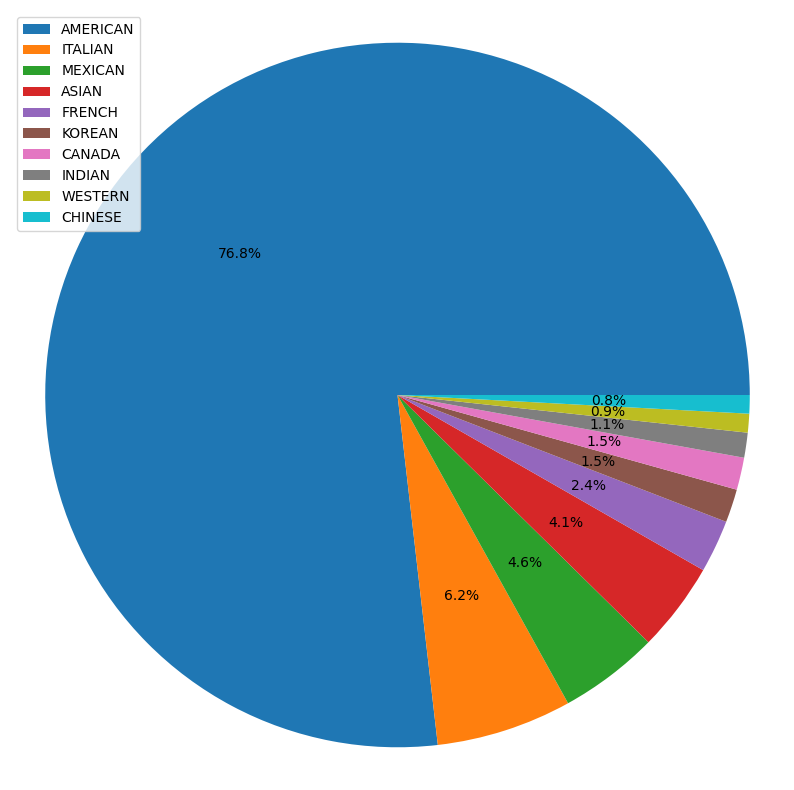

In [153]:
countries = df['COUNTRY'].value_counts().reset_index()
countries = countries[countries['count'] > 350]
plt.figure(figsize=[10,10])
plt.pie(data=countries,x='count', autopct='%1.1f%%')
plt.legend(labels=countries['COUNTRY'], loc='upper left')
plt.axis('equal')
plt.show()

Agora vamos mostrar os 10 países que tenham mais registros

In [154]:
df_top_10 = df['COUNTRY'].value_counts()[0:10].reset_index()
df_top_10

,COUNTRY,count
0,AMERICAN,40150
1,ITALIAN,3250
2,MEXICAN,2390
3,ASIAN,2144
4,FRENCH,1264
5,KOREAN,799
6,CANADA,774
7,INDIAN,598
8,WESTERN,450
9,CHINESE,442


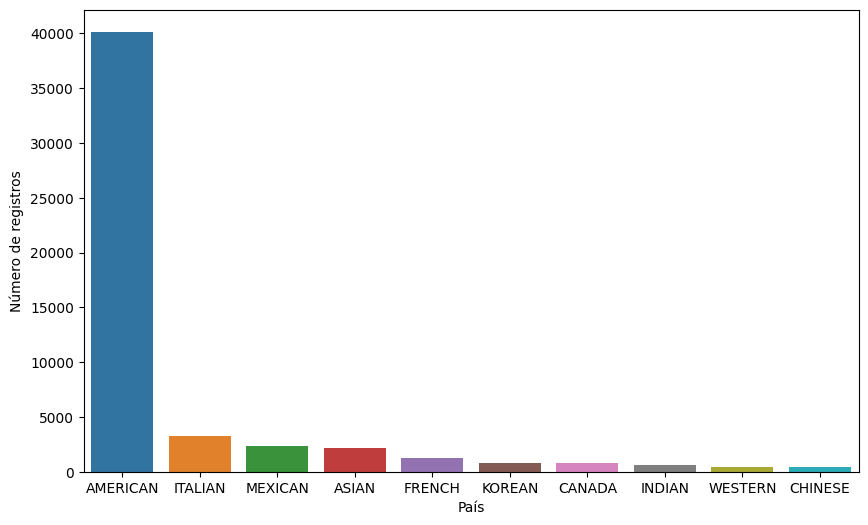

In [155]:
plt.figure(figsize=[10,6])
sns.barplot(data=df_top_10,x='COUNTRY',y='count', hue='COUNTRY')
plt.xlabel('País')
plt.ylabel('Número de registros')
plt.show()

Vamos ver os 5 ingredientes mais usados em cada país

In [156]:
colunas = df.columns.tolist()[1:384]
df[colunas] = df[colunas].replace({'No':False,'Yes':True})
df.dtypes

/tmp/ipykernel_7818/2184117037.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colunas] = df[colunas].replace({'No':False,'Yes':True})


COUNTRY       object
ALMOND          bool
ANGELICA        bool
ANISE           bool
ANISE_SEED      bool
               ...  
WOOD            bool
YAM             bool
YEAST           bool
YOGURT          bool
ZUCCHINI        bool
Length: 384, dtype: object

In [157]:
for country in df['COUNTRY'].unique():
    print('País: ',country,' ','\nIngredientes: ', df[df['COUNTRY'] == country].iloc[:,1:].sum().sort_values(ascending=False)[:5].keys().tolist(),'\n')

País:  VIETNAMESE   
Ingredientes:  ['FISH', 'GARLIC', 'RICE', 'CILANTRO', 'CAYENNE'] 

País:  INDIAN   
Ingredientes:  ['CUMIN', 'TURMERIC', 'ONION', 'CORIANDER', 'CAYENNE'] 

País:  SPANISH_PORTUGUESE   
Ingredientes:  ['OLIVE_OIL', 'GARLIC', 'ONION', 'BELL_PEPPER', 'TOMATO'] 

País:  JEWISH   
Ingredientes:  ['EGG', 'WHEAT', 'BUTTER', 'ONION', 'VEGETABLE_OIL'] 

País:  FRENCH   
Ingredientes:  ['BUTTER', 'EGG', 'WHEAT', 'OLIVE_OIL', 'CREAM'] 

País:  CENTRAL_SOUTHAMERICAN   
Ingredientes:  ['GARLIC', 'ONION', 'CAYENNE', 'TOMATO', 'CORN'] 

País:  CAJUN_CREOLE   
Ingredientes:  ['ONION', 'CAYENNE', 'GARLIC', 'BUTTER', 'VEGETABLE_OIL'] 

País:  THAI   
Ingredientes:  ['GARLIC', 'FISH', 'CAYENNE', 'CILANTRO', 'GINGER'] 

País:  SCANDINAVIAN   
Ingredientes:  ['BUTTER', 'EGG', 'CREAM', 'VINEGAR', 'WHEAT'] 

País:  GREEK   
Ingredientes:  ['OLIVE_OIL', 'GARLIC', 'ONION', 'LEMON_JUICE', 'TOMATO'] 

País:  AMERICAN   
Ingredientes:  ['BUTTER', 'EGG', 'WHEAT', 'ONION', 'MILK'] 

País:  AFRI